# Streaming Churn


<img src="https://ichef.bbci.co.uk/news/976/cpsprodpb/14E5F/production/_124199558_gettyimages-1362671953.jpg" />


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### use pandas to read the csv
### show the top rows
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# First, let's change the string value in "churn" to numerical value
df.loc[df.Churn == 'No', 'Churn'] = 0
df.loc[df.Churn == 'Yes', 'Churn'] = 1
df = df.astype({"Churn": 'int64'})   #   --> Change "churn" to int

# Continue

customers = len(df)
churn = sum(df['Churn'])

# Print the output below using the "print" function
print("There are %d customers %d of them Churn (%f%%)" % (customers, churn, (churn/customers*100)))



There are 7043 customers 1869 of them Churn (26.536987%)


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It seems like there aren't null values in the DF, but if we want to count 'Total charges' we will get an error. This is because of not numerical values(empty strings) which are not null. To fix it, we need to use pd.to_numeric() function and after that fill all nulls.

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float", errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now there are no null values in the DF

<br>
<br>
<hr class="dotted">
<br>
<br>

# Internet Service to CHURN

In [6]:
InternetServiceGrouped = df.groupby('InternetService').customerID.count()
InternetServiceGrouped

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: customerID, dtype: int64

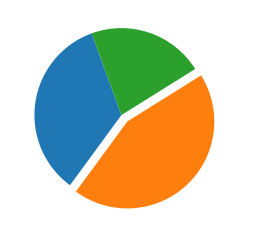

In [7]:
l=['DSL','Fiber Optic', 'No']
e = [0,0.1,0]
plt.pie(InternetServiceGrouped, labels = l, textprops=dict(color="w"), explode = e, startangle = 110)
plt.show()

In [8]:
df.groupby('InternetService').agg({'Churn':['count','sum','mean']})

Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

In [9]:
InternetServicToChurn = df.groupby('InternetService').agg({'Churn':['mean']})
InternetServicToChurn

,Churn
,mean
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Text(0, 0.5, 'Churn probability')

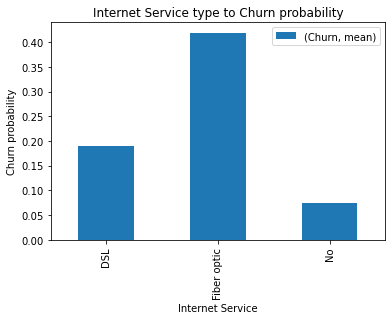

In [10]:
InternetServicToChurn.plot.bar().legend()
plt.title("Internet Service type to Churn probability")
plt.xlabel("Internet Service")
plt.ylabel("Churn probability")

The customers with FIBER OPTIC Internet Servic are much more likely to CHURN

<br>
<br>
<hr class="dotted">
<br>
<br>

# Contract Type to CHURN

In [11]:
df.groupby('Contract').agg({'Churn':['count','sum','mean']})

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

In [12]:
ContractType = df.groupby('Contract').agg({'Churn':['mean']})
ContractType

,Churn
,mean
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


Text(0, 0.5, 'Churn probability')

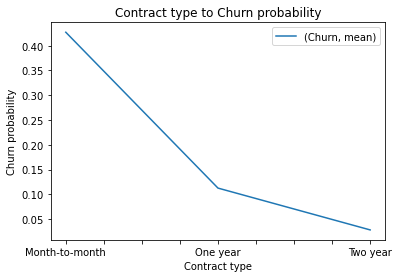

In [13]:
ContractType.plot.line().legend()
plt.title("Contract type to Churn probability")
plt.xlabel("Contract type")
plt.ylabel("Churn probability")

Customers with SHORT TERM contracts are much more likely to churn !

<br>
<br>
<hr class="dotted">
<br>
<br>

# Payment Method Type to CHURN

In [14]:
PaymentMethodGroup = df.groupby('PaymentMethod').customerID.count()
PaymentMethodGroup

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: customerID, dtype: int64

In [15]:
df.groupby('PaymentMethod').agg({'Churn':['count','sum','mean']})

Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

In [16]:
PaymentMethodToChurn = df.groupby('PaymentMethod').agg({'Churn':['mean']})
PaymentMethodToChurn

,Churn
,mean
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Text(0, 0.5, 'Churn probability')

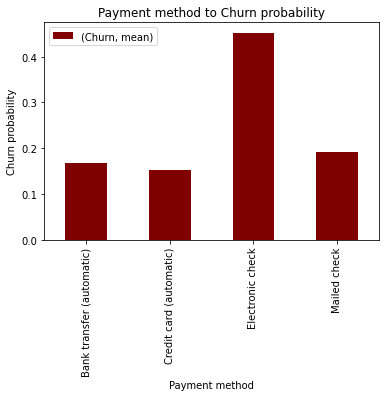

In [17]:
PaymentMethodToChurn.plot.bar(color ='maroon')
plt.legend()
plt.title("Payment method to Churn probability")
plt.xlabel("Payment method")
plt.ylabel("Churn probability")

Customers with ELECTRONIC CHECK payment method are much more likely to churn !

<br>
<br>
<hr class="dotted">
<br>
<br>

# Number Of Sevrices to CHURN

In [18]:
### Check if there is a connection between the number of services that a customer purchace to churn


Services=df

Services.loc[Services.PhoneService == 'No', 'PhoneService'] = 0
Services.loc[Services.PhoneService == 'Yes', 'PhoneService'] = 1
Services = Services.astype({"PhoneService": 'int64'}) 

Services.loc[Services.MultipleLines == 'No' , 'MultipleLines'] = 0
Services.loc[Services.MultipleLines == 'No phone service' , 'MultipleLines'] = 0
Services.loc[Services.MultipleLines == 'Yes', 'MultipleLines'] = 1
Services = Services.astype({"MultipleLines": 'int64'}) 

Services.loc[Services.InternetService == 'DSL' , 'InternetService'] = 1
Services.loc[Services.InternetService == 'Fiber optic' , 'InternetService'] = 1
Services.loc[Services.InternetService == 'No', 'InternetService'] = 0
Services.loc[Services.InternetService == '', 'InternetService'] = 0
Services = Services.astype({"InternetService": 'int64'}) 

Services.loc[Services.OnlineSecurity == 'No internet service', 'OnlineSecurity'] = 0
Services.loc[Services.OnlineSecurity == 'No', 'OnlineSecurity'] = 0
Services.loc[Services.OnlineSecurity == 'Yes', 'OnlineSecurity'] = 1
Services = Services.astype({"OnlineSecurity": 'int64'}) 

Services.loc[Services.OnlineBackup == 'No internet service', 'OnlineBackup'] = 0
Services.loc[Services.OnlineBackup == 'No', 'OnlineBackup'] = 0
Services.loc[Services.OnlineBackup == 'Yes', 'OnlineBackup'] = 1
Services = Services.astype({"OnlineBackup": 'int64'}) 

Services.loc[Services.DeviceProtection == 'No internet service', 'DeviceProtection'] = 0
Services.loc[Services.DeviceProtection == 'No', 'DeviceProtection'] = 0
Services.loc[Services.DeviceProtection == 'Yes', 'DeviceProtection'] = 1
Services = Services.astype({"DeviceProtection": 'int64'}) 

Services.loc[Services.TechSupport == 'No internet service', 'TechSupport'] = 0
Services.loc[Services.TechSupport == 'No', 'TechSupport'] = 0
Services.loc[Services.TechSupport == 'Yes', 'TechSupport'] = 1
Services = Services.astype({"TechSupport": 'int64'}) 

Services.loc[Services.StreamingTV == 'No internet service', 'StreamingTV'] = 0
Services.loc[Services.StreamingTV == 'No', 'StreamingTV'] = 0
Services.loc[Services.StreamingTV == 'Yes', 'StreamingTV'] = 1
Services = Services.astype({"StreamingTV": 'int64'}) 

Services.loc[Services.StreamingMovies == 'No internet service', 'StreamingMovies'] = 0
Services.loc[Services.StreamingMovies == 'No', 'StreamingMovies'] = 0
Services.loc[Services.StreamingMovies == 'Yes', 'StreamingMovies'] = 1
Services = Services.astype({"StreamingMovies": 'int64'}) 


cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]

#define new column that contains sum of specific columns
Services['sum_stats'] = Services[cols].sum(axis=1)

Services.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sum_stats
0,7590-VHVEG,Female,0,Yes,No,1,0,0,1,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.850000,0,2
1,5575-GNVDE,Male,0,No,No,34,1,0,1,1,...,0,0,0,One year,No,Mailed check,56.95,1889.500000,0,4
2,3668-QPYBK,Male,0,No,No,2,1,0,1,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.150002,1,4
3,7795-CFOCW,Male,0,No,No,45,0,0,1,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.750000,0,4
4,9237-HQITU,Female,0,No,No,2,1,0,1,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.649994,1,2


In [19]:
Services.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                 int64
sum_stats             int64
dtype: object

In [20]:
SumOfServicesToChurn = Services.groupby('sum_stats').agg({'Churn':['mean']})
SumOfServicesToChurn

,Churn
,mean
sum_stats,
1,0.109177
2,0.309662
3,0.449173
4,0.364767
5,0.313449
6,0.255507
7,0.224852
8,0.124051


Text(0, 0.5, 'Churn probability')

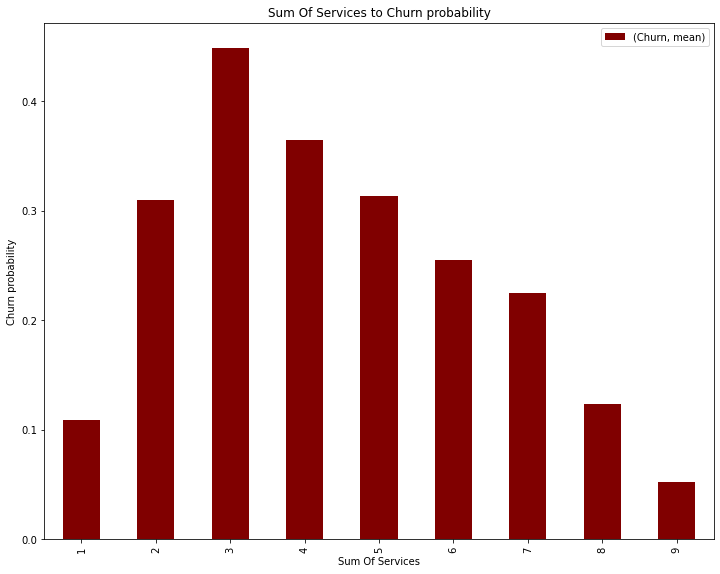

In [113]:
SumOfServicesToChurn.plot.bar(color ='maroon')
plt.legend()
plt.title("Sum Of Services to Churn probability")
plt.xlabel("Sum Of Services")
plt.ylabel("Churn probability")

Customers with low or high number of services are much less likely to churn !

<br>
<br>
<hr class="dotted">
<br>
<br>

# Gender Dist to CHURN

How distributed the churn by gender?

In [22]:
df.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

We can see that both genders have the same chance to churn

In [23]:
df.groupby('SeniorCitizen').agg({'Churn':['count','sum','mean']})

Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

We can see that senior citizen are more likly to churn


<br>
<br>
<hr class="dotted">
<br>
<br>

# Tenure distribution and Churn

Plot the tenure frequencies of the customers. (use an histogram)


In [24]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

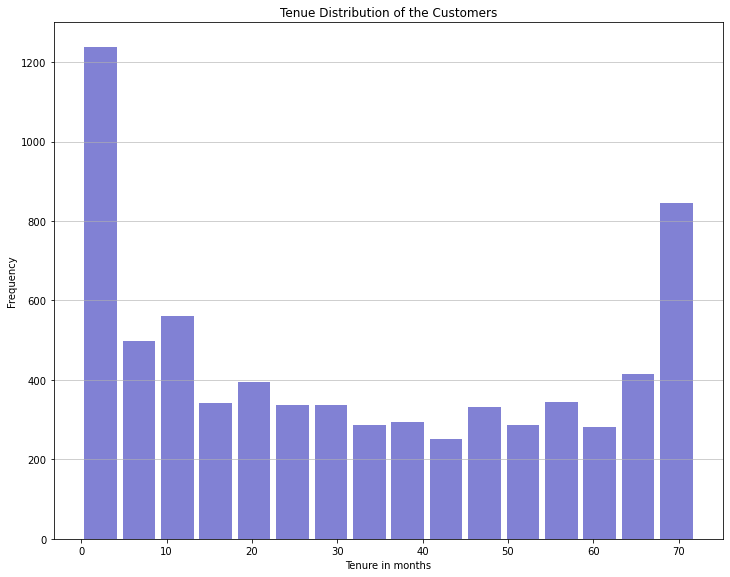

In [111]:
### A more sophisticated example...
plt.hist(x=df['tenure'].dropna(), bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure in months')
plt.ylabel('Frequency')
plt.title('Tenue Distribution of the Customers')
plt.show()

A lot of customers have a very short or very long tenure

<br>
<br>
<hr class="dotted">
<br>
<br>

#### Tenrure Group distribution and Churn
new variable (column) that will divide the customers in four tenure categories:

- short tenure: 0-12 mounths
- medium tenure: 12-36 mounths
- long tenure: 36-60 mounths
- very long tenure: 60 mounths and more


In [26]:
### create the categorical variables called "AgeGroup"
df['TenureGroup'] = None
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0,None
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,0,None
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1,None
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0,None
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1,None


In [27]:
df.loc[(df['tenure'] < 12),'TenureGroup'] = '0-12'
df.loc[(df['tenure'] >=12.) & (df['tenure'] < 36),'TenureGroup'] = '12-36'
df.loc[(df['tenure'] >=36.) & (df['tenure'] < 60),'TenureGroup'] = '36-60'
df.loc[(df['tenure'] >= 60.),'TenureGroup'] = '60+'
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0,0-12
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,0,12-36
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1,0-12
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0,36-60
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1,0-12


In [28]:
df.groupby('TenureGroup').agg({'Churn':['count',sum,'mean']})

Churn               
            count  sum      mean
TenureGroup                     
0-12         2069  999  0.482842
12-36        1923  502  0.261050
36-60        1568  269  0.171556
60+          1483   99  0.066757

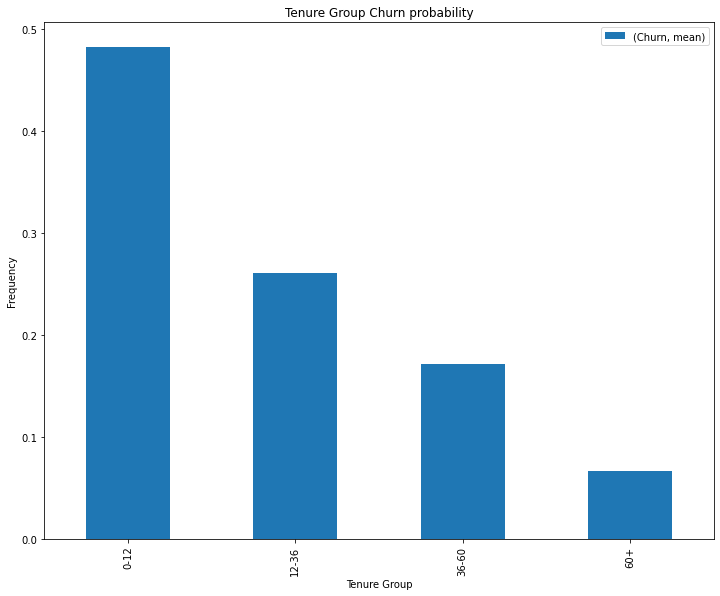

In [112]:
x = df.groupby('TenureGroup').agg({'Churn':['mean']})

x.plot.bar().legend()

plt.xlabel('Tenure Group')
plt.ylabel('Frequency')
plt.title('Tenure Group Churn probability')
plt.show()


Almost half of the short tenure customers churn the streaming

<br>
<br>
<hr class="dotted">
<br>
<br>

# Mounly Charges ---> Churn

Where there differences on churn by mounthly charges?

In [30]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

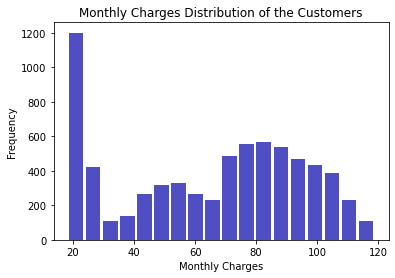

In [31]:
plt.hist(x=df['MonthlyCharges'].dropna(), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution of the Customers')
plt.show()

In [32]:
df['MonthlyChargesGroup'] = None

In [33]:
df.loc[(df['MonthlyCharges'] < 35.5),'MonthlyChargesGroup'] = '35 or less'
df.loc[(df['MonthlyCharges'] >=35.5) & (df['MonthlyCharges'] < 70.35),'MonthlyChargesGroup'] = '35 to 70'
df.loc[(df['MonthlyCharges'] >=70.35) & (df['MonthlyCharges'] < 89.85),'MonthlyChargesGroup'] = '70 to 90'
df.loc[(df['MonthlyCharges'] > 89.85),'MonthlyChargesGroup'] = 'Over 90 '

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90


In [34]:
df.groupby('MonthlyChargesGroup').agg({'Churn':['count',sum,'mean']})

Churn               
                    count  sum      mean
MonthlyChargesGroup                     
35 or less           1759  198  0.112564
35 to 70             1760  433  0.246023
70 to 90             1753  658  0.375357
Over 90              1758  578  0.328783

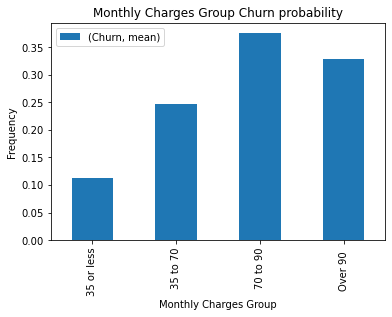

In [35]:
y = df.groupby('MonthlyChargesGroup').agg({'Churn':['mean']})
y.plot.bar().legend()
plt.xlabel('Monthly Charges Group')
plt.ylabel('Frequency')
plt.title('Monthly Charges Group Churn probability')
plt.show()

In [36]:
Contract_Charges_Churn = df.groupby(['Contract','MonthlyChargesGroup']).agg({'Churn':['mean']})
Contract_Charges_Churn

Churn
                                        mean
Contract       MonthlyChargesGroup          
Month-to-month 35 or less           0.251040
               35 to 70             0.356561
               70 to 90             0.532423
               Over 90              0.521839
One year       35 or less           0.030534
               35 to 70             0.086253
               70 to 90             0.111538
               Over 90              0.208520
Two year       35 or less           0.007752
               35 to 70             0.024648
               70 to 90             0.015576
               Over 90              0.070136

Text(0, 0.5, 'Churn probability')

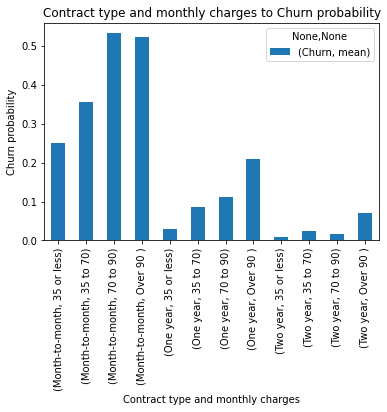

In [37]:
Contract_Charges_Churn.plot.bar()
plt.title("Contract type and monthly charges to Churn probability")
plt.xlabel("Contract type and monthly charges")
plt.ylabel("Churn probability")

<br>
<br>
<hr class="dotted">
<br>
<br>

#### Tenure Group and Monthly Charges Group ---> Churn


Text(0, 0.5, 'Churn Probability')

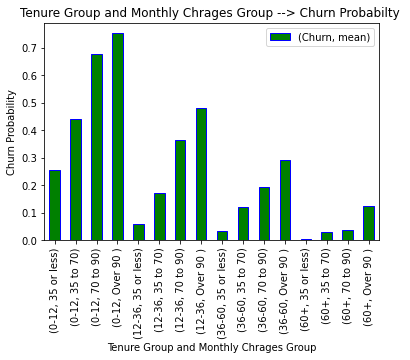

In [38]:
m = df.groupby(['TenureGroup','MonthlyChargesGroup']).agg({'Churn':['mean']})
m.plot.bar(color = ('g'), edgecolor='blue').legend()


plt.title("Tenure Group and Monthly Chrages Group --> Churn Probabilty ")
plt.xlabel("Tenure Group and Monthly Chrages Group")
plt.ylabel("Churn Probability")

<br>
<br>
We can see that for every monthly charges - the probability to churn is begger for the customers with short tenure
<br>

<br>
<br>
<hr class="dotted">
<br>
<br>

## Churn probability for customers with family and without

In [39]:
df['Family']=1
df.loc[(df['Partner']=='No') & (df['Dependents']=='No'),'Family'] = 0
df = df.drop(['Partner','Dependents'], axis=1)
df.head(5)

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less,1
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70,0
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70,0
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70,0
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90,0


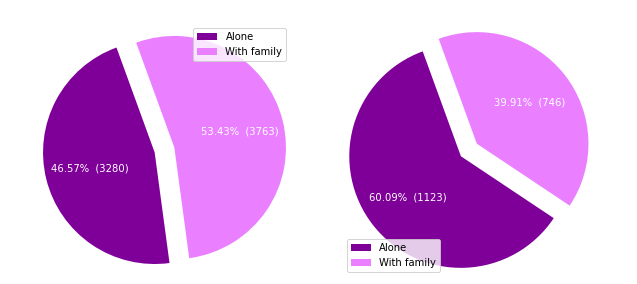

In [40]:
Family=df.groupby(['Family']).Churn.count()
Family1=df.groupby(['Family']).Churn.sum()
l=['Alone','With family']
e = [0.1,0.1]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10, 10))
c = ["#7f0099", "#ea80ff"]
plt.subplot(1, 2, 1)
plt.pie(Family, labels = l,  textprops=dict(color="w"), explode = e, startangle = 110, autopct=make_autopct(Family), radius=1.1,  colors = c)
plt.title('Qty customers with family and without', c='w')
plt.legend()
plt.subplot(1, 2, 2)
plt.pie(Family1, labels = l, textprops=dict(color="w"), explode = e, startangle = 110, autopct=make_autopct(Family1), radius=1.1,  colors = c)
plt.title('Qty churn for customers with family and without', c='w')
plt.legend()
plt.show()

In [41]:
FamilyDF=pd.DataFrame({'Qty customers':Family, 'Qty churn':Family1})
FamilyDF.index =FamilyDF.index.map({0:'Alone', 1:'With family'})
FamilyDF

,Qty customers,Qty churn
Family,,
Alone,3280,1123
With family,3763,746


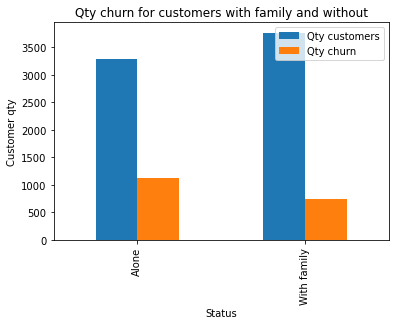

In [42]:
FamilyDF.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Customer qty')
plt.title('Qty churn for customers with family and without')
plt.show()

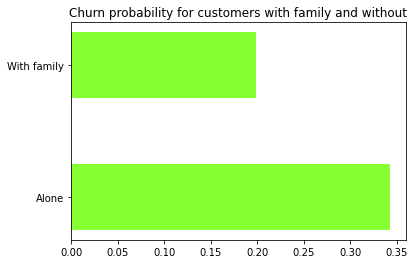

In [43]:
Family2=df.groupby(['Family']).Churn.mean()
l=['Alone','With family' ]
plt.barh(l, Family2, height = 0.5, color = "#86FF33")
plt.title("Churn probability for customers with family and without")
plt.show()

We can see that lonely customers  have more chance to churn instead of customer with family

<br>
<br>
<hr class="dotted">
<br>
<br>

## Total charges and probability to churn 

In [44]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

In [45]:
df['TotalChargesGroup'] = None
df.loc[(df['TotalCharges'] < 500),'TotalChargesGroup'] = 'Charges less then 500'
df.loc[(df['TotalCharges'] >=500) & (df['TotalCharges'] < 3000),'TotalChargesGroup'] = 'Charges between 500-3000'
df.loc[(df['TotalCharges'] > 3000),'TotalChargesGroup'] = 'Charges more then 3000'

In [46]:
ChargesGroup=df.groupby(['TotalChargesGroup']).agg({'Churn':['count',sum]})
ChargesGroup

Churn     
                         count  sum
TotalChargesGroup                  
Charges between 500-3000  2828  690
Charges less then 500     2011  829
Charges more then 3000    2204  350

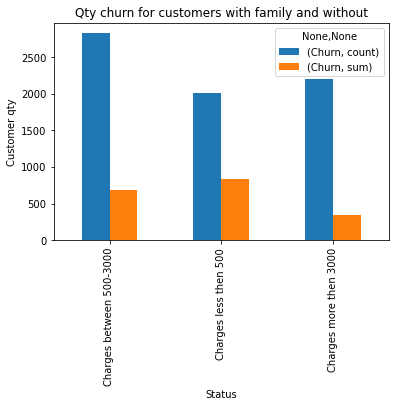

In [47]:
ChargesGroup.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Customer qty')
plt.title('Qty churn for customers with family and without')
plt.show()

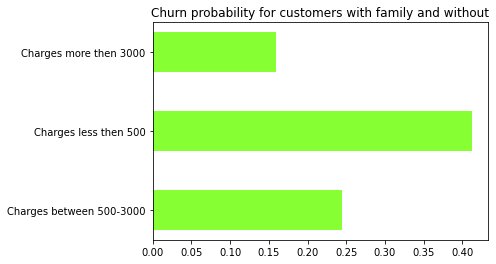

In [48]:
ChargesGroupMean=df.groupby(['TotalChargesGroup']).Churn.mean()
plt.barh(ChargesGroupMean.index, ChargesGroupMean, height = 0.5, color = "#86FF33")
plt.title("Churn probability for customers with family and without")
plt.show()

Customers which bring to the company more than 3000 have less probability to churn then others.
The biggest probability to churn is for group with total charges less than 500

## Churn according to total charges and type of internet service

In [49]:
InternetService=pd.DataFrame({'tenure':df.tenure, 'TotalCharges':df.TotalCharges, 'InternetService':df.InternetService,'Churn':df.Churn})
InternetService.loc[InternetService.Churn == 0, 'Churn'] = 'No'
InternetService.loc[InternetService.Churn == 1, 'Churn'] = 'Yes'
InternetService

,tenure,TotalCharges,InternetService,Churn
0,1,29.850000,DSL,No
1,34,1889.500000,DSL,No
2,2,108.150002,DSL,Yes
3,45,1840.750000,DSL,No
4,2,151.649994,Fiber optic,Yes
...,...,...,...,...
7038,24,1990.500000,DSL,No
7039,72,7362.899902,Fiber optic,No
7040,11,346.450012,DSL,No
7041,4,306.600006,Fiber optic,Yes


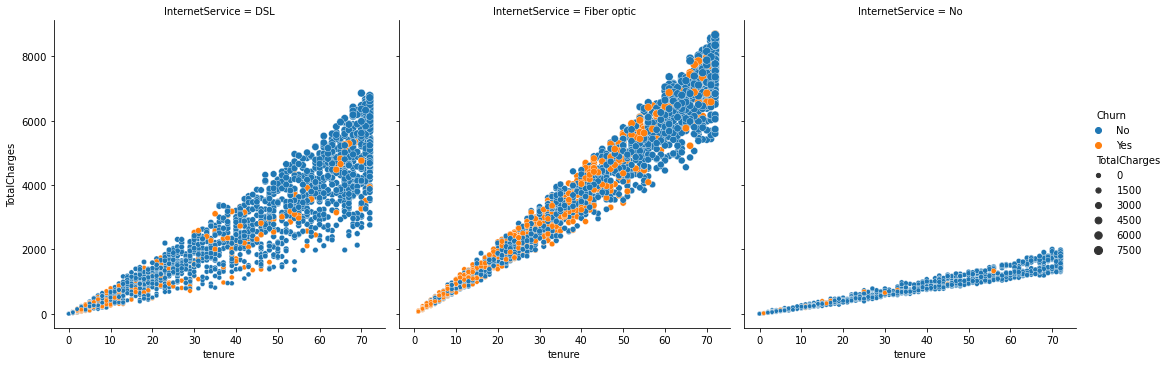

In [50]:
sns.relplot(data=InternetService, x="tenure", y="TotalCharges", hue="Churn", col="InternetService", size='TotalCharges')

From the graph, it can be seen that most of the departed customers have fiber optic internet, short tenure, and small or average total charges


<br>
<br>
<hr class="dotted">
<br>
<br>

## Service group probability to churn

In [51]:
df['Service'] = 'Without Service'
df.loc[(df['InternetService'] !='No') & (df['PhoneService'] == 1),'Service'] = 'With 2 services'
df.loc[(df['InternetService'] =='No')   & (df['PhoneService'] == 1),'Service'] = 'Only with phone service'
df.loc[(df['InternetService'] !='No') & (df['PhoneService'] == 0),'Service'] = 'Only with internet service'
df

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less,1,Charges less then 500,Only with internet service
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70,0,Charges less then 500,With 2 services
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90,0,Charges less then 500,With 2 services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,1,Yes,DSL,Yes,No,Yes,...,Yes,Mailed check,84.80,1990.500000,0,12-36,70 to 90,1,Charges between 500-3000,With 2 services
7039,2234-XADUH,Female,0,72,1,Yes,Fiber optic,No,Yes,Yes,...,Yes,Credit card (automatic),103.20,7362.899902,0,60+,Over 90,1,Charges more then 3000,With 2 services
7040,4801-JZAZL,Female,0,11,0,No phone service,DSL,Yes,No,No,...,Yes,Electronic check,29.60,346.450012,0,0-12,35 or less,1,Charges less then 500,Only with internet service
7041,8361-LTMKD,Male,1,4,1,Yes,Fiber optic,No,No,No,...,Yes,Mailed check,74.40,306.600006,1,0-12,70 to 90,1,Charges less then 500,With 2 services


In [52]:
df.groupby('Service').agg({'Churn':['count',sum,'mean']})

Churn                
                           count   sum      mean
Service                                         
Only with internet service   682   170  0.249267
Only with phone service     1526   113  0.074050
With 2 services             4835  1586  0.328025

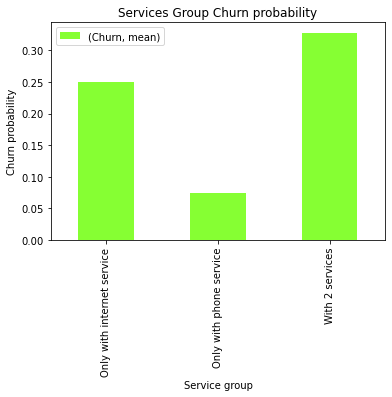

In [53]:
y = df.groupby('Service').agg({'Churn':['mean']})
y.plot.bar(color = "#86FF33").legend()
plt.xlabel('Service group')
plt.ylabel('Churn probability')
plt.title('Services Group Churn probability')
plt.show()

We can see that clients with phone and internet services have more probability to churn

<br>
<br>
<hr class="dotted">
<br>
<br>

## Plot correlations to churn

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TenureGroup', 'MonthlyChargesGroup', 'Family',
       'TotalChargesGroup', 'Service'],
      dtype='object')

In [55]:
df_corr=df.drop(['customerID','PhoneService', 'MultipleLines','OnlineSecurity', 'MultipleLines', 'DeviceProtection',
                 'TechSupport', 'StreamingTV','StreamingMovies', 'OnlineBackup', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis=1) 

df_corr.loc[df.PaperlessBilling == 'No', 'PaperlessBilling'] = 0
df_corr.loc[df.PaperlessBilling == 'Yes', 'PaperlessBilling'] = 1
df_corr = df_corr.astype({"PaperlessBilling": 'int64'}) 
df_corr

,gender,SeniorCitizen,InternetService,Contract,PaperlessBilling,PaymentMethod,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service
0,Female,0,DSL,Month-to-month,1,Electronic check,0,0-12,35 or less,1,Charges less then 500,Only with internet service
1,Male,0,DSL,One year,0,Mailed check,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services
2,Male,0,DSL,Month-to-month,1,Mailed check,1,0-12,35 to 70,0,Charges less then 500,With 2 services
3,Male,0,DSL,One year,0,Bank transfer (automatic),0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service
4,Female,0,Fiber optic,Month-to-month,1,Electronic check,1,0-12,70 to 90,0,Charges less then 500,With 2 services
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,DSL,One year,1,Mailed check,0,12-36,70 to 90,1,Charges between 500-3000,With 2 services
7039,Female,0,Fiber optic,One year,1,Credit card (automatic),0,60+,Over 90,1,Charges more then 3000,With 2 services
7040,Female,0,DSL,Month-to-month,1,Electronic check,0,0-12,35 or less,1,Charges less then 500,Only with internet service
7041,Male,1,Fiber optic,Month-to-month,1,Mailed check,1,0-12,70 to 90,1,Charges less then 500,With 2 services


In [56]:
df_corr = pd.get_dummies(df_corr)
df_corr

,SeniorCitizen,PaperlessBilling,Churn,Family,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,...,MonthlyChargesGroup_35 or less,MonthlyChargesGroup_35 to 70,MonthlyChargesGroup_70 to 90,MonthlyChargesGroup_Over 90,TotalChargesGroup_Charges between 500-3000,TotalChargesGroup_Charges less then 500,TotalChargesGroup_Charges more then 3000,Service_Only with internet service,Service_Only with phone service,Service_With 2 services
0,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7040,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

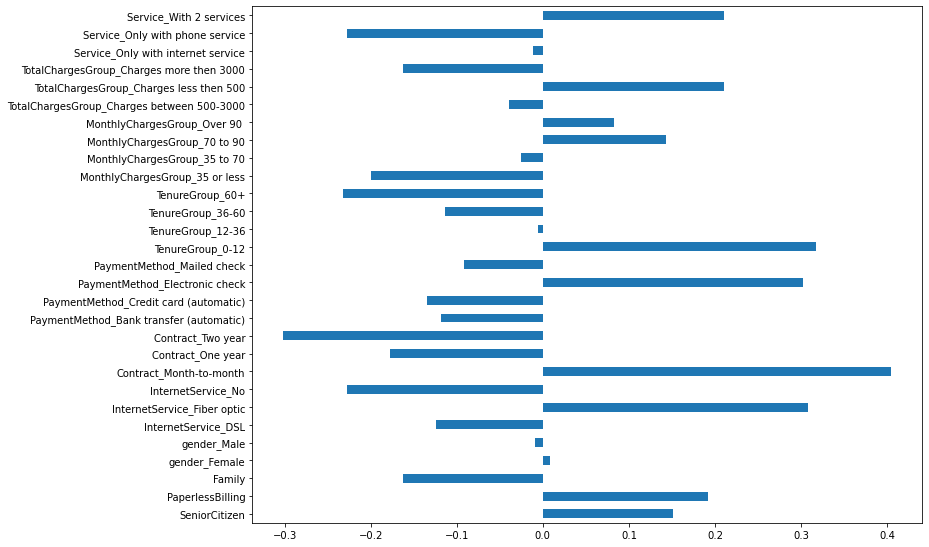

In [57]:
plt.rcParams["figure.figsize"] = (12,9.5)
df_corr.corr()['Churn'].drop('Churn').plot(kind='barh')

<br>
<br>
<hr class="dotted">
<br>
<br>

## Check if there is a connection between the customerID and CHURN

In [58]:
# new data frame with split value columns
new = df['customerID'].str.split("-", n = 1, expand = True)
  
# making separate CustomerID Num column from new data frame
df["CustomerID_Number"]= new[0]
  
# making separate CustomerID Char column from new data frame
df["CustomerID_Character"]= new[1]
df.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service,CustomerID_Number,CustomerID_Character
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,29.85,29.850000,0,0-12,35 or less,1,Charges less then 500,Only with internet service,7590,VHVEG
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,56.95,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services,5575,GNVDE
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,53.85,108.150002,1,0-12,35 to 70,0,Charges less then 500,With 2 services,3668,QPYBK
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,42.30,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service,7795,CFOCW
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,70.70,151.649994,1,0-12,70 to 90,0,Charges less then 500,With 2 services,9237,HQITU


In [59]:
df['CustomerID_Number'] = df['CustomerID_Number'].astype(int)
df['CusNumGroup'] = None

df.loc[(df['CustomerID_Number'] < 2500),'CusNumGroup'] = 'CusNum Less then 2500'
df.loc[(df['CustomerID_Number'] >=2500) & (df['CustomerID_Number'] < 5000),'CusNumGroup'] = 'CusNum Between 2500-5000'
df.loc[(df['CustomerID_Number'] >=5000) & (df['CustomerID_Number'] < 7500),'CusNumGroup'] = 'CusNum Between 5000-7500'
df.loc[(df['CustomerID_Number'] > 7500),'CusNumGroup'] = 'CusNum Over 7500'

df.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service,CustomerID_Number,CustomerID_Character,CusNumGroup
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,29.850000,0,0-12,35 or less,1,Charges less then 500,Only with internet service,7590,VHVEG,CusNum Over 7500
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services,5575,GNVDE,CusNum Between 5000-7500
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,108.150002,1,0-12,35 to 70,0,Charges less then 500,With 2 services,3668,QPYBK,CusNum Between 2500-5000
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service,7795,CFOCW,CusNum Over 7500
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,151.649994,1,0-12,70 to 90,0,Charges less then 500,With 2 services,9237,HQITU,CusNum Over 7500


In [60]:
CusIDNumGroup=df.groupby(['CusNumGroup']).agg({'Churn':['count',sum,'mean']})
CusIDNumGroup

Churn               
                         count  sum      mean
CusNumGroup                                  
CusNum Between 2500-5000  1810  519  0.286740
CusNum Between 5000-7500  1780  452  0.253933
CusNum Less then 2500     1716  455  0.265152
CusNum Over 7500          1737  443  0.255037

It looks like there is no connection between the CustomerID and CHURN

In [61]:
df = df.drop(['CustomerID_Character', 'CusNumGroup', 'CustomerID_Number'], axis=1) # Drop the features which aren't informative
df

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less,1,Charges less then 500,Only with internet service
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70,0,Charges less then 500,With 2 services
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90,0,Charges less then 500,With 2 services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,1,Yes,DSL,Yes,No,Yes,...,Yes,Mailed check,84.80,1990.500000,0,12-36,70 to 90,1,Charges between 500-3000,With 2 services
7039,2234-XADUH,Female,0,72,1,Yes,Fiber optic,No,Yes,Yes,...,Yes,Credit card (automatic),103.20,7362.899902,0,60+,Over 90,1,Charges more then 3000,With 2 services
7040,4801-JZAZL,Female,0,11,0,No phone service,DSL,Yes,No,No,...,Yes,Electronic check,29.60,346.450012,0,0-12,35 or less,1,Charges less then 500,Only with internet service
7041,8361-LTMKD,Male,1,4,1,Yes,Fiber optic,No,No,No,...,Yes,Mailed check,74.40,306.600006,1,0-12,70 to 90,1,Charges less then 500,With 2 services


<br>
<br>
<hr class="dotted">
<br>
<br>

## Conclusion
From the raw data we can learn that about 26% percent of the customers churn.
The customers who had churn are more likly to have:
- A short term contract.
- Short Tenure.
- Expensive mounthly charges (over 70$).
- Senior Citizen.
- ELECTRONIC CHECK payment method.
- Both phone and internet service (especially with fiber optic internet service).
- About 3 different kind services.
- Without partners and depends.
- Total charges less than 500.



<br>
<br>
<hr class="dotted">
<br>
<br>

## ML Algorithms

In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TenureGroup', 'MonthlyChargesGroup', 'Family',
       'TotalChargesGroup', 'Service'],
      dtype='object')

In [63]:
df_ml = df
df_ml.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargesGroup,Family,TotalChargesGroup,Service
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less,1,Charges less then 500,Only with internet service
1,5575-GNVDE,Male,0,34,1,No,DSL,Yes,No,Yes,...,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000,With 2 services
2,3668-QPYBK,Male,0,2,1,No,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70,0,Charges less then 500,With 2 services
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,Yes,No,Yes,...,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000,Only with internet service
4,9237-HQITU,Female,0,2,1,No,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90,0,Charges less then 500,With 2 services


In [64]:
df_ml = df.rename(columns=str.lower) # Rename columns to lower letters
df_ml = df_ml.drop(['customerid', 'service'], axis=1)
df_ml['monthlycharges'] = df_ml['monthlycharges'].astype(float)
df_ml

,gender,seniorcitizen,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenuregroup,monthlychargesgroup,family,totalchargesgroup
0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.850000,0,0-12,35 or less,1,Charges less then 500
1,Male,0,34,1,No,DSL,Yes,No,Yes,No,...,One year,No,Mailed check,56.95,1889.500000,0,12-36,35 to 70,0,Charges between 500-3000
2,Male,0,2,1,No,DSL,Yes,Yes,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.150002,1,0-12,35 to 70,0,Charges less then 500
3,Male,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.750000,0,36-60,35 to 70,0,Charges between 500-3000
4,Female,0,2,1,No,Fiber optic,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.649994,1,0-12,70 to 90,0,Charges less then 500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,1,Yes,DSL,Yes,No,Yes,Yes,...,One year,Yes,Mailed check,84.80,1990.500000,0,12-36,70 to 90,1,Charges between 500-3000
7039,Female,0,72,1,Yes,Fiber optic,No,Yes,Yes,No,...,One year,Yes,Credit card (automatic),103.20,7362.899902,0,60+,Over 90,1,Charges more then 3000
7040,Female,0,11,0,No phone service,DSL,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,29.60,346.450012,0,0-12,35 or less,1,Charges less then 500
7041,Male,1,4,1,Yes,Fiber optic,No,No,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.600006,1,0-12,70 to 90,1,Charges less then 500


In [65]:
df_ml.churn.value_counts(normalize=True)


0    0.73463
1    0.26537
Name: churn, dtype: float64

In [66]:
df_ml = pd.get_dummies(df_ml) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
df_ml

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,family,gender_Female,gender_Male,phoneservice_0,phoneservice_1,...,tenuregroup_12-36,tenuregroup_36-60,tenuregroup_60+,monthlychargesgroup_35 or less,monthlychargesgroup_35 to 70,monthlychargesgroup_70 to 90,monthlychargesgroup_Over 90,totalchargesgroup_Charges between 500-3000,totalchargesgroup_Charges less then 500,totalchargesgroup_Charges more then 3000
0,0,1,29.85,29.850000,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.500000,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2,0,2,53.85,108.150002,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,45,42.30,1840.750000,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,2,70.70,151.649994,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.500000,0,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
7039,0,72,103.20,7362.899902,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7040,0,11,29.60,346.450012,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.600006,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [67]:
df_ml.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn',
       'family', 'gender_Female', 'gender_Male', 'phoneservice_0',
       'phoneservice_1', 'multiplelines_No', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No',
       'techsupport_No internet service', 'techsupport_Yes', 'streamingtv_No',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paperlessbilling_No', 'paperlessbilling_Yes',
       'p

In [68]:
df_ml.corr()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,family,gender_Female,gender_Male,phoneservice_0,phoneservice_1,...,tenuregroup_12-36,tenuregroup_36-60,tenuregroup_60+,monthlychargesgroup_35 or less,monthlychargesgroup_35 to 70,monthlychargesgroup_70 to 90,monthlychargesgroup_Over 90,totalchargesgroup_Charges between 500-3000,totalchargesgroup_Charges less then 500,totalchargesgroup_Charges more then 3000
seniorcitizen,1.000000,0.016567,0.220173,0.103006,0.150889,-0.022518,0.001874,-0.001874,-0.008576,0.008576,...,0.015729,0.007180,0.000507,-0.176395,-0.067957,0.084421,0.156606,-0.014578,-0.073413,0.086922
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.344733,-0.005106,0.005106,-0.008448,0.008448,...,-0.241531,0.337217,0.742860,-0.089274,-0.136896,-0.066226,0.290569,-0.033220,-0.692551,0.709717
monthlycharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.055170,0.014569,-0.014569,-0.247398,0.247398,...,-0.039946,0.060421,0.190478,-0.816019,-0.175366,0.295622,0.692708,-0.188343,-0.384057,0.573216
totalcharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.275572,0.000080,-0.000080,-0.113214,0.113214,...,-0.226950,0.235150,0.652392,-0.417754,-0.198847,0.027171,0.586652,-0.297601,-0.583434,0.882931
churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.162835,0.008612,-0.008612,-0.011942,0.011942,...,-0.005995,-0.113707,-0.232317,-0.199679,-0.025291,0.143398,0.082833,-0.039665,0.210275,-0.162890
family,-0.022518,0.344733,0.055170,0.275572,-0.162835,1.000000,-0.017422,0.017422,-0.009033,0.009033,...,-0.031586,0.089107,0.255276,0.011300,-0.061372,-0.044508,0.094523,0.008146,-0.244804,0.229846
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,-0.017422,1.000000,-1.000000,-0.006488,0.006488,...,-0.002137,0.020109,-0.015634,-0.005336,-0.010251,0.017627,-0.001075,-0.000318,-0.001845,0.002133
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,0.017422,-1.000000,1.000000,0.006488,-0.006488,...,0.002137,-0.020109,0.015634,0.005336,0.010251,-0.017627,0.001075,0.000318,0.001845,-0.002133
phoneservice_0,-0.008576,-0.008448,-0.247398,-0.113214,-0.011942,-0.009033,-0.006488,0.006488,1.000000,-1.000000,...,-0.008849,0.018655,-0.016020,0.069510,0.308919,-0.188492,-0.188850,0.061854,0.037489,-0.101908
phoneservice_1,0.008576,0.008448,0.247398,0.113214,0.011942,0.009033,0.006488,-0.006488,-1.000000,1.000000,...,0.008849,-0.018655,0.016020,-0.069510,-0.308919,0.188492,0.188850,-0.061854,-0.037489,0.101908


In [69]:
corr  = df_ml.corr()['churn'].drop('churn')
kot = corr [(corr>=0.25) | (corr<=-0.25)]
kot

tenure                           -0.352229
internetservice_Fiber optic       0.308020
onlinesecurity_No                 0.342637
onlinebackup_No                   0.268005
deviceprotection_No               0.252481
techsupport_No                    0.337281
contract_Month-to-month           0.405103
contract_Two year                -0.302253
paymentmethod_Electronic check    0.301919
tenuregroup_0-12                  0.317666
Name: churn, dtype: float64

In [70]:
df_ml = df_ml.astype(float)

In [71]:
df_ml.isna().sum()

seniorcitizen                                 0
tenure                                        0
monthlycharges                                0
totalcharges                                  0
churn                                         0
family                                        0
gender_Female                                 0
gender_Male                                   0
phoneservice_0                                0
phoneservice_1                                0
multiplelines_No                              0
multiplelines_No phone service                0
multiplelines_Yes                             0
internetservice_DSL                           0
internetservice_Fiber optic                   0
internetservice_No                            0
onlinesecurity_No                             0
onlinesecurity_No internet service            0
onlinesecurity_Yes                            0
onlinebackup_No                               0
onlinebackup_No internet service        

In [82]:
from sklearn.model_selection import train_test_split
test_size = round(df.customerID.count()*0.2)
train, test = train_test_split(df_ml, test_size=test_size, random_state=0, shuffle=True)
label = 'churn'
x_train = train.drop(label, axis=1)
y_train = train[label]
x_test, y_test = test.drop(label, axis=1), test[label]


In [83]:
train

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,family,gender_Female,gender_Male,phoneservice_0,phoneservice_1,...,tenuregroup_12-36,tenuregroup_36-60,tenuregroup_60+,monthlychargesgroup_35 or less,monthlychargesgroup_35 to 70,monthlychargesgroup_70 to 90,monthlychargesgroup_Over 90,totalchargesgroup_Charges between 500-3000,totalchargesgroup_Charges less then 500,totalchargesgroup_Charges more then 3000
2920,0.0,72.0,85.10,6155.399902,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2966,1.0,14.0,46.35,672.700012,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6099,0.0,71.0,24.70,1810.550049,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5482,0.0,33.0,73.90,2405.050049,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2012,0.0,47.0,98.75,4533.700195,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,15.0,103.45,1539.800049,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3264,0.0,10.0,91.10,964.349976,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1653,0.0,58.0,20.75,1185.949951,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2607,1.0,1.0,69.75,69.750000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [84]:
test

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,family,gender_Female,gender_Male,phoneservice_0,phoneservice_1,...,tenuregroup_12-36,tenuregroup_36-60,tenuregroup_60+,monthlychargesgroup_35 or less,monthlychargesgroup_35 to 70,monthlychargesgroup_70 to 90,monthlychargesgroup_Over 90,totalchargesgroup_Charges between 500-3000,totalchargesgroup_Charges less then 500,totalchargesgroup_Charges more then 3000
2200,0.0,19.0,58.20,1045.250000,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4627,0.0,60.0,116.60,7049.500000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3225,0.0,13.0,71.95,923.849976,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2828,0.0,1.0,20.45,20.450001,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3768,0.0,55.0,77.75,4266.399902,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1.0,7.0,99.25,665.450012,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5333,0.0,13.0,88.35,1222.800049,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6972,1.0,56.0,111.95,6418.899902,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4598,0.0,18.0,56.25,969.849976,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [85]:
x_train

,seniorcitizen,tenure,monthlycharges,totalcharges,family,gender_Female,gender_Male,phoneservice_0,phoneservice_1,multiplelines_No,...,tenuregroup_12-36,tenuregroup_36-60,tenuregroup_60+,monthlychargesgroup_35 or less,monthlychargesgroup_35 to 70,monthlychargesgroup_70 to 90,monthlychargesgroup_Over 90,totalchargesgroup_Charges between 500-3000,totalchargesgroup_Charges less then 500,totalchargesgroup_Charges more then 3000
2920,0.0,72.0,85.10,6155.399902,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2966,1.0,14.0,46.35,672.700012,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6099,0.0,71.0,24.70,1810.550049,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5482,0.0,33.0,73.90,2405.050049,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2012,0.0,47.0,98.75,4533.700195,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,15.0,103.45,1539.800049,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3264,0.0,10.0,91.10,964.349976,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1653,0.0,58.0,20.75,1185.949951,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2607,1.0,1.0,69.75,69.750000,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [86]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

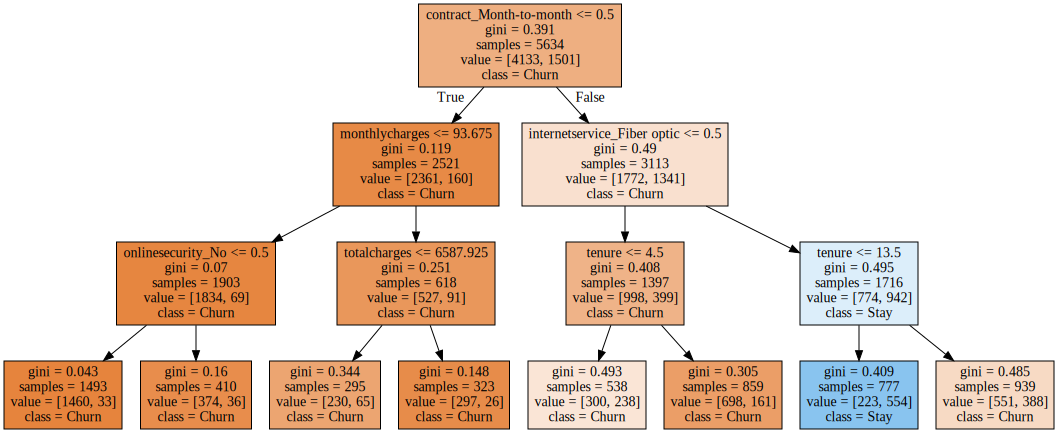

In [88]:
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
plot_tree(clf, x_train.columns, ['Churn', 'Stay'])


In [89]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [90]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

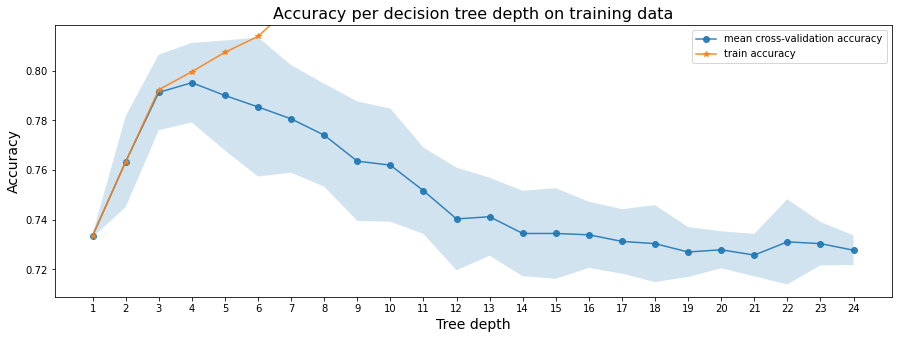

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [116]:

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% '.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-4 tree achieves the best mean cross-validation accuracy 79.51737 +/- 0.80053% 


<br>
<br>
<hr class="dotted">
<br>
<br>

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv



# Importing the algorithm


# define the algorithm:
    # arg:
        # n_estimators = 100
        # max_dept = 3
        # random_state = 1
            
            
# running\training the algorithm with the train data

# making a prediction based on "test" data features

# saving results to DataFrame
# saving results to csv

In [95]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([1.21057530e-03, 1.33704264e-01, 1.85309174e-02, 7.82723967e-02,
       4.13903162e-04, 0.00000000e+00, 8.11512359e-07, 3.15531769e-04,
       0.00000000e+00, 3.12120152e-04, 3.00747605e-04, 3.32436036e-04,
       1.51774375e-02, 8.75125604e-02, 1.93931234e-03, 7.30736929e-02,
       1.49383377e-02, 1.21491323e-02, 1.23281867e-02, 7.97923892e-03,
       5.58843051e-04, 1.80391857e-02, 6.70626849e-03, 1.21725536e-03,
       8.20398058e-02, 1.32941003e-02, 5.89097864e-03, 1.04086481e-04,
       1.04556076e-02, 1.02232938e-03, 6.33109505e-04, 5.48859197e-03,
       1.21846929e-03, 1.67553698e-01, 4.25808675e-03, 3.81178317e-02,
       3.58847426e-03, 9.59811505e-04, 3.51369075e-04, 3.71233526e-04,
       6.12963268e-02, 4.86759619e-04, 4.74306162e-02, 3.67705661e-04,
       1.19972415e-03, 1.13220981e-02, 5.49446699e-03, 1.63950333e-03,
       3.36970534e-03, 2.25560033e-03, 3.97399524e-04, 2.37954558e-02,
       2.05838989e-02])

In [96]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
33,contract_Month-to-month,1.675537e-01
1,tenure,1.337043e-01
13,internetservice_Fiber optic,8.751256e-02
24,techsupport_No,8.203981e-02
3,totalcharges,7.827240e-02
15,onlinesecurity_No,7.307369e-02
40,paymentmethod_Electronic check,6.129633e-02
42,tenuregroup_0-12,4.743062e-02
35,contract_Two year,3.811783e-02
51,totalchargesgroup_Charges less then 500,2.379546e-02


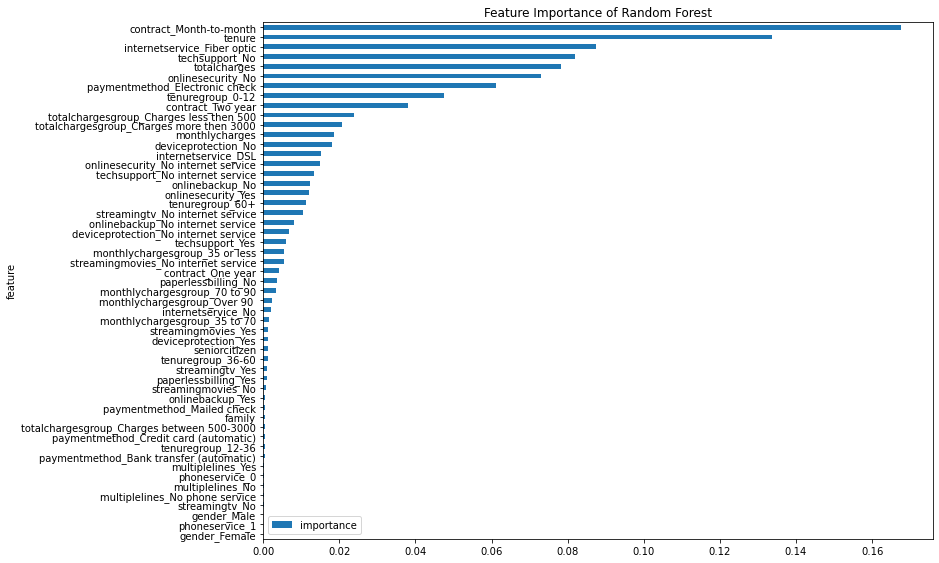

In [103]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

In [104]:
# Evaluation for Random Forest with 3 depths
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7785663591199432

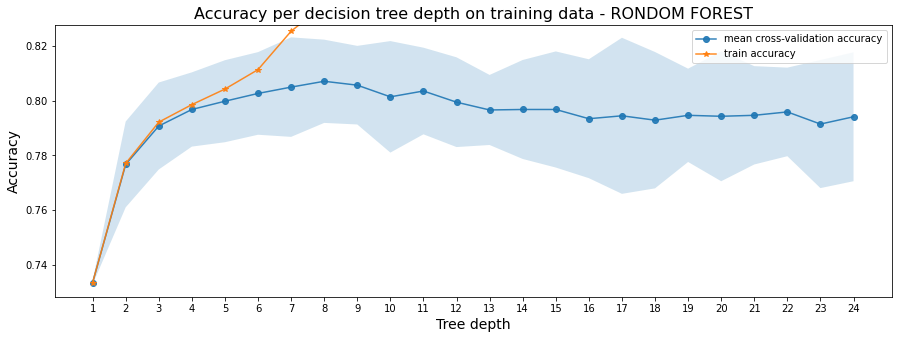

In [105]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data - RONDOM FOREST')






In [106]:

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy in the RANDOM FOREST algo {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

# function for training and evaluating a tree
def run_single_tree(x_train, y_train, test, y_test, depth):
    model = RandomForestClassifier(max_depth=depth).fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(x_train, y_train, 
                                                                          x_test, y_test, 
                                                                        sm_best_tree_depth)

The depth-8 tree achieves the best mean cross-validation accuracy in the RANDOM FOREST algo 80.70654 +/- 0.75964% on training dataset
Single tree depth:  8
Accuracy, Training Set:  83.29783 %
Accuracy, Test Set:  79.20511 %


<br>
<br>
<hr class="dotted">
<br>
<br>

# KNN - K Nearest Neighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv



In [108]:
# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7423704755145494

0.7842441447835344
[23]
The K nearest neighbors-[23] achieves the best mean cross-validation accuracy in the KNN algo 78.42441on training dataset


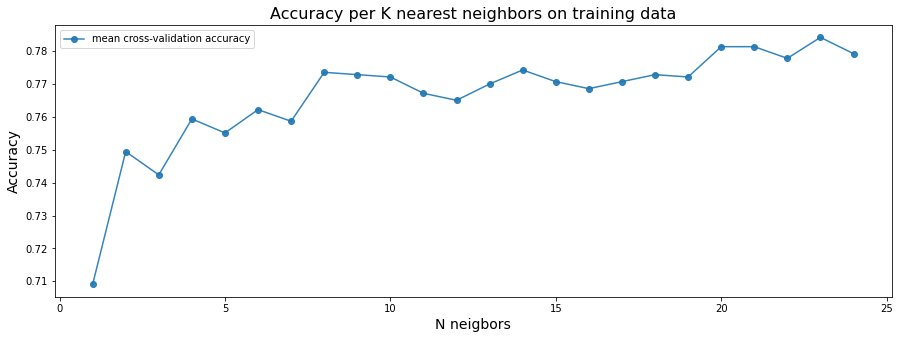

In [109]:
n=1
scores_list = []
scores_dict = {}


while n<25:

    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_Knn)
    test_acc
    scores_list.append(test_acc)
    scores_dict[n]= test_acc
    n=n+1

def plot_knn(n_neighbors, scores_list, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(n_neighbors, scores_list, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ylim = plt.ylim()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('N neigbors', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.legend()
    
# fitting trees of depth 1 to 24
n_neighbors = range(1,25)

# plotting accuracy
plot_knn(n_neighbors, scores_list, 'Accuracy per K nearest neighbors on training data')


biggest_value = max(scores_list)
print(biggest_value)

keys = [k for k, v in scores_dict.items() if v == biggest_value]
print(keys)  
print('The K nearest neighbors-{} achieves the best mean cross-validation accuracy in the KNN algo {}'.format(
      keys, round(biggest_value*100,5)))
    